
I am Nandini and in this kernel we will explore loan approval dataset from Analytics Vidya competition.
<br>Please __Upvote__ this kernel if you like content.
### Problem Statement:
​
__About Company__ <br>
Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan.
​
__Problem__ <br>
Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.
​
#### Dataset Description:
​
| Variable | Description | 
|------|------|
| Loan_ID | Unique Loan ID | 
| Gender | Male/ Female | 
| Married | Applicant married (Y/N) | 
| Dependents | Number of dependents | 
| Education | Applicant Education (Graduate/ Under Graduate) | 
| Self_Employed | Self employed (Y/N) | 
| ApplicantIncome | Applicant income | 
| CoapplicantIncome | Coapplicant income | 
| LoanAmount | Loan amount in thousands | 
| Loan_Amount_Term | Term of loan in months | 
| Credit_History | credit history meets guidelines | 
| Property_Area | Urban/ Semi Urban/ Rural | 
| Loan_Status | Loan approved (Y/N) | 

In [1]:
import numpy as np 
import pandas as pd
import warnings
## Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Configure libraries
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('seaborn')

import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/analytics-vidhya-loan-prediction/train.csv
/kaggle/input/analytics-vidhya-loan-prediction/test.csv


In [2]:
train_data = pd.read_csv('../input/analytics-vidhya-loan-prediction/train.csv')
test_data = pd.read_csv('../input/analytics-vidhya-loan-prediction/test.csv')

In [3]:
test_data1 = test_data.copy()

In [4]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Class Distribution

Another important thing to make sure before feeding our data into the model is the class distribution of the data. In our case where the expected class are divided into two outcome, 'yes' and 'no', a class distribution of 50:50 can be considered ideal.

In [5]:
train_data["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

As we can see our class distribution is more or less similar, not exactly 50:50 distribution but still good enough.

In [6]:
# To get the top 5 records of test
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [7]:
train_data.describe(include ='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001002,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


In [8]:
# To get the dimensions of train data
train_data.shape

(614, 13)

In [9]:
# To get the dimensions of test data
test_data.shape

(367, 12)

In [10]:
#removing duplicates from train data
train_data.drop_duplicates(keep='first', inplace=True)
train_data.shape

(614, 13)

In [11]:
#removing duplicates from test data
test_data.drop_duplicates(keep='first', inplace=True)
test_data.shape

(367, 12)

In [12]:
#checking data types of train data
train_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [13]:
#checking data types of test data
test_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [14]:
#checking any unique values are there in train data
train_data.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [15]:
#checking any unique values are there in test data
test_data.nunique()

Loan_ID              367
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      314
CoapplicantIncome    194
LoanAmount           144
Loan_Amount_Term      12
Credit_History         2
Property_Area          3
dtype: int64

## Missing Values
Last thing to check before moving on is missing values. In some case our data might have missing values in some column, this can be caused some reasons such as human error. We can use the is_null() function from Pandas to check for any missing data and then use the sum() function to see the total of missing values in each column.

In [16]:
#checking sum of null values from train data
train_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [17]:
#checking sum of null values from test data
test_data.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

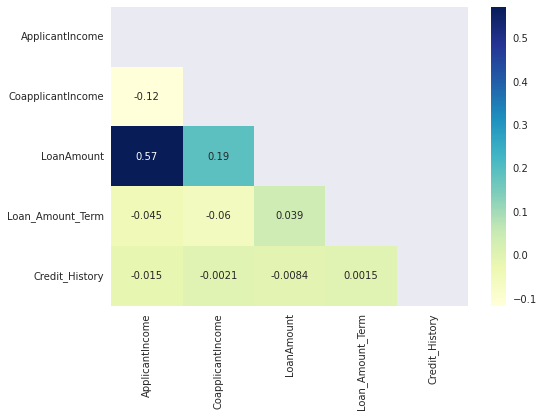

In [18]:
# creating mask
mask = np.triu(np.ones_like(train_data.corr()))
 
# plotting a triangle correlation heatmap
dataplot = sns.heatmap(train_data.corr(), cmap="YlGnBu", annot=True, mask=mask)
 
# displaying heatmap
plt.show()

In [19]:
cols = train_data.columns
cols

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [20]:
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Loan_Status','Loan_Amount_Term']

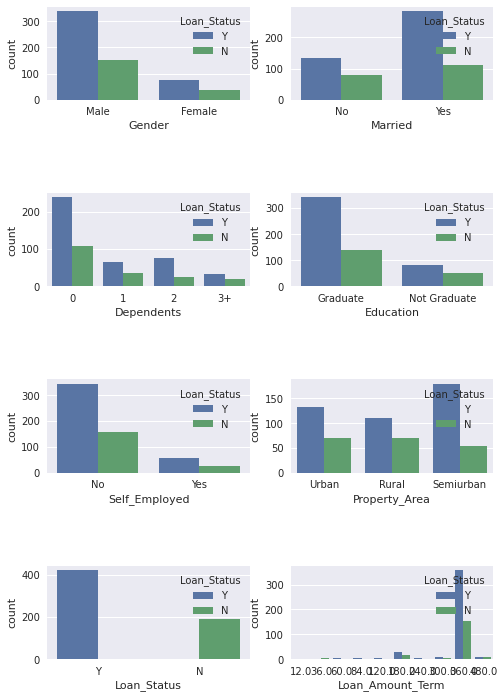

In [21]:
fig,axes = plt.subplots(4,2,figsize=(8,12))
for idx,cat_col in enumerate(categorical_columns):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=train_data,hue='Loan_Status',ax=axes[row,col])


plt.subplots_adjust(hspace=1)

#### Plots above convey following things about the dataset:
1. Loan Approval Status: About 2/3rd of applicants have been granted loan.
2. Sex: There are more Men  than Women (approx. 3x). which leads to wrong predictions better to drop it
3. Martial Status: 2/3rd of the population in the dataset is Marred; Married applicants are more likely to be granted loans.
4. Dependents: Majority of the population have zero dependents and are also likely to accepted for loan.
5. Education: About 5/6th of the population is Graduate and graduates have higher propotion of loan approval
6. Employment: 5/6th of population is not self employed.
7. Property Area: More applicants from Semi-urban and also likely to be granted loans.
8. Applicant with credit history are far more likely to be accepted.
9. Loan Amount Term: Majority of the loans taken are for 360 Months (30 years).

Now, let's also analyze Numerical Columns:

In [22]:
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

       ApplicantIncome  CoapplicantIncome  LoanAmount
count       614.000000         614.000000  592.000000
mean       5403.459283        1621.245798  146.412162
std        6109.041673        2926.248369   85.587325
min         150.000000           0.000000    9.000000
25%        2877.500000           0.000000  100.000000
50%        3812.500000        1188.500000  128.000000
75%        5795.000000        2297.250000  168.000000
max       81000.000000       41667.000000  700.000000


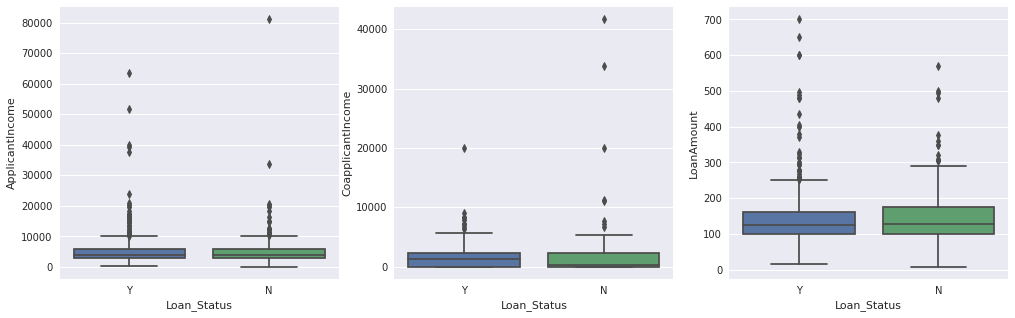

In [23]:
fig,axes = plt.subplots(1,3,figsize=(17,5))
for idx,num_col in enumerate(numerical_columns):
    sns.boxplot(y=num_col,data=train_data,x='Loan_Status',ax=axes[idx])

print(train_data[numerical_columns].describe())
plt.subplots_adjust(hspace=1)

For Numercical Columns, there is no significant relation to Loan approval status.

### Preprocessing Data:
Input data needs to be pre-processed before we feed it to model. Following things need to be taken care:
1. Encoding Categorical Features.
2. Imputing missing values

In [24]:
train_data["Loan_Status"] = train_data["Loan_Status"].map({"Y" : 1, "N" : 0})

In [25]:
train_data["Loan_Status"].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [26]:
xtr = train_data.drop(["Loan_ID","Loan_Status","Gender"],axis=1)
xte = test_data.drop(["Loan_ID","Gender"],axis=1)

In [27]:
ytr = train_data[["Loan_Status"]]

In [28]:
cat_cols = [col for col in xtr.columns if xtr.dtypes[col]=="object"]
cat_cols

['Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']

In [29]:
num_cols = [col for col in xtr.columns if xtr.dtypes[col] !="object"]
num_cols

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [30]:
xtr_cat = xtr[cat_cols]
xtr_num = xtr[num_cols]
xte_cat = xte[cat_cols]
xte_num = xte[num_cols]

### Null value imputation

In [31]:
from sklearn.impute import SimpleImputer
cat_impu=SimpleImputer(strategy="most_frequent")
num_impu=SimpleImputer(strategy="median" )
xtr_cat=pd.DataFrame(cat_impu.fit_transform(xtr_cat),columns=cat_cols)
xte_cat=pd.DataFrame(cat_impu.fit_transform(xte_cat),columns=cat_cols)
xtr_num=pd.DataFrame(num_impu.fit_transform(xtr_num),columns=num_cols)
xte_num=pd.DataFrame(num_impu.fit_transform(xte_num),columns=num_cols)

In [32]:
# Function to convert all object columns to categorical
xtr_cat[cat_cols]=xtr_cat[cat_cols].astype("category")
xte_cat[cat_cols]=xte_cat[cat_cols].astype("category")

## Encode Categorical Value

Same as the numerical data, we also need to pre-process our categorical data from words to number to make it easier for the computer to understands. To do this we will use `LabelEncoder()` provided by sklearn. Basically 

we replace the categorical value with a numeric value between 0 and the number of classes minus 1. If the categorical variable value contains 5 distinct classes, we use (0, 1, 2, 3, and 4).it will transform a categorical column from this:
    
| State | State |         
| --- | --- |
| Maharastra | 3 |
| Tamil nadu | 4 |
| Delhi | 0 |
| Karnataka | 2 |
| Gujarat | 1 |
| Uttar Pradesh | 5 |

You might be wondering why the numbering is not in sequence (Top-Down), and the answer is that the numbering is assigned in alphabetical order. Delhi is assigned 0 followed by Gujarat as 1 and so on.



In [33]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [34]:
for col in cat_cols:
    xtr_cat[col]=encoder.fit_transform(xtr_cat[col])
    xte_cat[col]=encoder.fit_transform(xte_cat[col])

In [35]:
xtr_cat.head()

,Married,Dependents,Education,Self_Employed,Property_Area
0,0,0,0,0,2
1,1,1,0,0,0
2,1,0,0,1,2
3,1,0,1,0,2
4,0,0,0,0,2


In [36]:
train_data.shape

(614, 13)

In [37]:
xtr=pd.concat([xtr_num,xtr_cat],axis=1)

In [38]:
xte=pd.concat([xte_num,xte_cat],axis=1)

In [39]:
columnsxtr = xtr.columns
columnsxtr

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Married', 'Dependents',
       'Education', 'Self_Employed', 'Property_Area'],
      dtype='object')

In [40]:
columnsxte = xte.columns
columnsxte

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Married', 'Dependents',
       'Education', 'Self_Employed', 'Property_Area'],
      dtype='object')

# Scale Numeric Data

Next up, we will scale our numerical data to avoid outlier presence that can significantly affect our model. Using `StandardScaler()` function from sklearn we can scale each our columns that contains numerical data. The scaling will be done using the formula below:

<div align="center">$Z = \frac{X - U}{S}$</div>

*Where:*

*$Z:$ scaled value*

*$X:$ original value*

*$U:$ mean of the data*

*$S:$ standard deviation of the data*

In [41]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale.fit(xtr)

StandardScaler()

In [42]:
xtr = pd.DataFrame(scale.transform(xtr),columns=columnsxtr)

In [43]:
xtr.isnull().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Married              0
Dependents           0
Education            0
Self_Employed        0
Property_Area        0
dtype: int64

In [44]:
xte.isnull().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Married              0
Dependents           0
Education            0
Self_Employed        0
Property_Area        0
dtype: int64

In [45]:
xte.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ApplicantIncome    367 non-null    float64
 1   CoapplicantIncome  367 non-null    float64
 2   LoanAmount         367 non-null    float64
 3   Loan_Amount_Term   367 non-null    float64
 4   Credit_History     367 non-null    float64
 5   Married            367 non-null    int64  
 6   Dependents         367 non-null    int64  
 7   Education          367 non-null    int64  
 8   Self_Employed      367 non-null    int64  
 9   Property_Area      367 non-null    int64  
dtypes: float64(5), int64(5)
memory usage: 28.8 KB


In [46]:
xte = pd.DataFrame(scale.transform(xte),columns=columnsxte)

In [47]:
xte.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Married,Dependents,Education,Self_Employed,Property_Area
0,0.051857,-0.554487,-0.425428,0.273231,0.411733,0.728816,-0.737806,-0.528362,-0.392601,1.223298
1,-0.381297,-0.041468,-0.235040,0.273231,0.411733,0.728816,0.253470,-0.528362,-0.392601,1.223298
2,-0.066097,0.061136,0.740701,0.273231,0.411733,0.728816,1.244745,-0.528362,-0.392601,1.223298
3,-0.501872,0.316278,-0.544421,0.273231,0.411733,0.728816,1.244745,-0.528362,-0.392601,1.223298
4,-0.348532,-0.554487,-0.806205,0.273231,0.411733,-1.372089,-0.737806,1.892641,-0.392601,1.223298


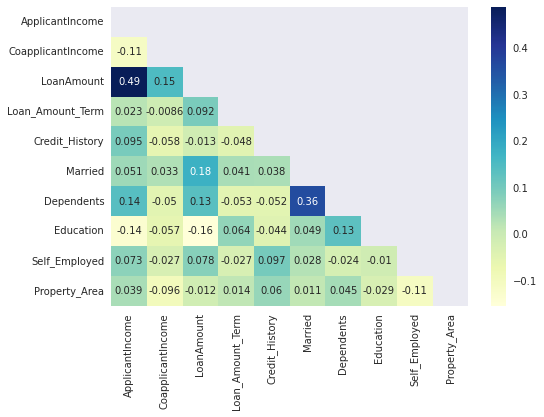

In [48]:
# creating mask
mask = np.triu(np.ones_like(xte.corr()))
 
# plotting a triangle correlation heatmap
dataplot = sns.heatmap(xte.corr(), cmap="YlGnBu", annot=True, mask=mask)
 
# displaying heatmap
plt.show()

## Split Dataset for Training and Testing

To finish up our data pre-processing steps we will split our data into two dataset, training and testing. In this case because we have enough data we will split the data with ratio of 75:25 for training and testing respectively

In [49]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(xtr,ytr,test_size=0.25,random_state=142)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(460, 10)
(154, 10)
(460, 1)
(154, 1)


## Model Building
After making sure our data is good and ready we can continue to building our model. In this notebook we will try to build 4 different models with different algorithm. In this step we will create a baseline model for each algorithm using the default paramaeters set by sklearn and after building all 4 of our models we will compare them to see which works best for our case.

To evaluate our model we will use the confusion matrix as our base for the evaluation.

<div align='center'><img src='https://miro.medium.com/max/2102/1*fxiTNIgOyvAombPJx5KGeA.png' height='40'></div>
where: TP = True Positive; FP = False Positive; TN = True Negative; FN = False Negative.

We will use 6 metrics below to evaluate models:

1. Accuracy: the proportion of true results among the total number of cases examined.
<div align='center'>$Accuracy = \frac{TP+TN}{TP+TN+FP+FN}$</div>
2. Precision: used to calculate how much proportion of all data that was predicted positive **was** actually positive.
<div align='center'>$Precision = \frac{TP}{TP+FP}$</div>
3. Recall: used to calculate how much proportion of actual positives is correctly classified.
<div align='center'>$Recall = \frac{TP}{TP+FN}$</div>
4. F1 score: a number between 0 and 1 and is the harmonic mean of precision and recall.
<div align='center'>$F1 = \frac{2TP}{2TP+FP+FN}$</div>
5. Cohen Kappa Score: Cohen's kappa measures the agreement between two raters who each classify N items into C mutually exclusive categories.
<div align='center'>$\kappa = \frac{p_o-p_e}{1-p_e}$</div>
    where $p_o$ is the empirical probability of agreement on the label assigned to any sample (the observed agreement ratio), and $p_e$ is the expected agreement when both annotators assign labels randomly. $p_e$ is estimated using a per-annotator empirical prior over the class labels.
6. Area Under Curve (AUC): indicates how well the probabilities from the positive classes are separated from the negative classes


In [50]:

def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

## Decision Tree

Decision tree is a tree shaped diagram used to determine a course of action. Each branch of the tree represents a possible decision, occurrence or reaction.

Advantages:
* Inexpensive to construct
* Extremely fast at classifying unknown records
* Easy to interpret for small-sized trees•
* Accuracy is comparable to other classification techniques for many simple data sets

Disadvantages:
* Overfitting when algorithm capture noise in the data
* The model can get unstable due to small variation of data
* Low biased tree: difficult for the model to work with new data

### Building Model

In [51]:
from sklearn import tree

# Building Decision Tree model 
dtc = tree.DecisionTreeClassifier(random_state=0)
dtc.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

### Model Evaluation

In [52]:
# Evaluate Model
dtc_eval = evaluate_model(dtc, x_test, y_test)

# Print result
print('Accuracy:', dtc_eval['acc'])
print('Precision:', dtc_eval['prec'])
print('Recall:', dtc_eval['rec'])
print('F1 Score:', dtc_eval['f1'])
print('Cohens Kappa Score:', dtc_eval['kappa'])
print('Area Under Curve:', dtc_eval['auc'])
print('Confusion Matrix:\n', dtc_eval['cm'])

Accuracy: 0.7207792207792207
Precision: 0.8316831683168316
Recall: 0.7636363636363637
F1 Score: 0.7962085308056872
Cohens Kappa Score: 0.35546038543897207
Area Under Curve: 0.6886363636363636
Confusion Matrix:
 [[27 17]
 [26 84]]


#### Mis-classifications
It can be seen that majority of the misclassifications are happening because of Loan Reject applicants being classified as Accept.

Let's look into Random Forest Classifier if it can reduce mis-classifications

## Random Forest

Random forest or Random Decision Forest is a method that operates by constructing multiple decision trees during training phases. The decision of the majority of the trees is chosen as final decision.

<div align='center'><img src='https://static.javatpoint.com/tutorial/machine-learning/images/random-forest-algorithm2.png' height='30'></div>

Advantages:
* It can be used for both regression and classification tasks and that it’s easy to view the relative importance it assigns to the input features.
* It is also considered as a very handy and easy to use algorithm, because it’s default hyper-parameters often produce a good prediction result.

Disadvantages:
* Many trees can make the algorithm to slow and ineffective for real-time predictions. A more accurate prediction requires more trees, which results in a slower model.
* It is a predictive modelling tool and not a descriptive tool.

### Building Model

In [53]:
from sklearn.ensemble import RandomForestClassifier

# Building Random Forest model 
rf = RandomForestClassifier(random_state=0)
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

### Model Evaluation

In [54]:
# Evaluate Model
rf_eval = evaluate_model(rf, x_test, y_test)

# Print result
print('Accuracy:', rf_eval['acc'])
print('Precision:', rf_eval['prec'])
print('Recall:', rf_eval['rec'])
print('F1 Score:', rf_eval['f1'])
print('Cohens Kappa Score:', rf_eval['kappa'])
print('Area Under Curve:', rf_eval['auc'])
print('Confusion Matrix:\n', rf_eval['cm'])

Accuracy: 0.8181818181818182
Precision: 0.8253968253968254
Recall: 0.9454545454545454
F1 Score: 0.8813559322033897
Cohens Kappa Score: 0.5
Area Under Curve: 0.7801652892561983
Confusion Matrix:
 [[ 22  22]
 [  6 104]]


## Naive Bayes

Naive Bayes is a simple technique for constructing classifiers: models that assign class labels to problem instances, represented as vectors of feature values, where the class labels are drawn from some finite set. There is not a single algorithm for training such classifiers, but a family of algorithms based on a common principle: all naive Bayes classifiers assume that the value of a particular feature is independent of the value of any other feature, given the class variable. Below are the Bayes theorem formula:

<div align="center">$P(C | A) = \frac{P(A|C) P(C)}{P(A)}$</div>

For example, given:
* A doctor knows that meningitis  causes  stiff neck 50% of the time
* Prior probability  of any patient  having  meningitis  is 1/50,000
* Prior probability  of any patient  having  stiff neck is 1/20

Then the probability of patient who have stiff neck to also have meningitis is:

<div align="center">$P(C | A) = \frac{P(A|C) P(C)}{P(A)} = \frac{0.5 * (1 / 50000)}{1 / 20} = 0.0002$</div>

### Building Model

In [55]:
from sklearn.naive_bayes import GaussianNB

# Building Naive Bayes model 
nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB()

In [56]:
# Evaluate Model
nb_eval = evaluate_model(nb, x_test, y_test)

# Print result
print('Accuracy:', nb_eval['acc'])
print('Precision:', nb_eval['prec'])
print('Recall:', nb_eval['rec'])
print('F1 Score:', nb_eval['f1'])
print('Cohens Kappa Score:', nb_eval['kappa'])
print('Area Under Curve:', nb_eval['auc'])
print('Confusion Matrix:\n', nb_eval['cm'])

Accuracy: 0.8246753246753247
Precision: 0.816793893129771
Recall: 0.9727272727272728
F1 Score: 0.8879668049792532
Cohens Kappa Score: 0.49867374005305043
Area Under Curve: 0.734297520661157
Confusion Matrix:
 [[ 20  24]
 [  3 107]]


## K-Nearest Neighbors

K-Nearest Neighbors (KNN) classify new data by finding k-number of closest neighbor from the training data and then decide the class based on the majority of it's neighbors. For example in the image below where $k = 3$ majority of it's neighbor is classified as B, but when $k = 7$ the majority will changes to A.


<div align='center'><img src='https://miro.medium.com/max/587/1*hncgU7vWLBsRvc8WJhxlkQ.png' height='50'></div>

Advantages:
* Simple technique that is easily implemented
* Building model is cheap
* Extremely flexible classification scheme

Disadvantages:
* Classifying unknown records are relatively expensive
* Requires distance computation of k-nearest neighbors
* Computationally intensive, especially when the size of the training set grows
* Accuracy can be severely degraded by the presence of noisy or irrelevant features

### Building Model

In [57]:
from sklearn.neighbors import KNeighborsClassifier

# Building KNN model 
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

### Model Evaluation

In [58]:
# Evaluate Model
knn_eval = evaluate_model(knn, x_test, y_test)

# Print result
print('Accuracy:', knn_eval['acc'])
print('Precision:', knn_eval['prec'])
print('Recall:', knn_eval['rec'])
print('F1 Score:', knn_eval['f1'])
print('Cohens Kappa Score:', knn_eval['kappa'])
print('Area Under Curve:', knn_eval['auc'])
print('Confusion Matrix:\n', knn_eval['cm'])

Accuracy: 0.8051948051948052
Precision: 0.8125
Recall: 0.9454545454545454
F1 Score: 0.8739495798319329
Cohens Kappa Score: 0.4559585492227979
Area Under Curve: 0.7347107438016529
Confusion Matrix:
 [[ 20  24]
 [  6 104]]


## model comparison

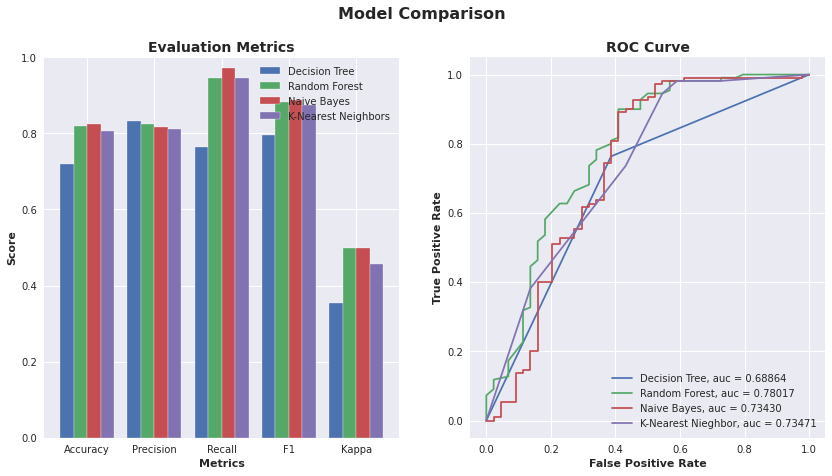

In [59]:
# Intitialize figure with two plots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.2
dtc_score = [dtc_eval['acc'], dtc_eval['prec'], dtc_eval['rec'], dtc_eval['f1'], dtc_eval['kappa']]
rf_score = [rf_eval['acc'], rf_eval['prec'], rf_eval['rec'], rf_eval['f1'], rf_eval['kappa']]
nb_score = [nb_eval['acc'], nb_eval['prec'], nb_eval['rec'], nb_eval['f1'], nb_eval['kappa']]
knn_score = [knn_eval['acc'], knn_eval['prec'], knn_eval['rec'], knn_eval['f1'], knn_eval['kappa']]

## Set position of bar on X axis
r1 = np.arange(len(dtc_score))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

## Make the plot# Intitialize figure with two plots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.2
dtc_score = [dtc_eval['acc'], dtc_eval['prec'], dtc_eval['rec'], dtc_eval['f1'], dtc_eval['kappa']]
rf_score = [rf_eval['acc'], rf_eval['prec'], rf_eval['rec'], rf_eval['f1'], rf_eval['kappa']]
nb_score = [nb_eval['acc'], nb_eval['prec'], nb_eval['rec'], nb_eval['f1'], nb_eval['kappa']]
knn_score = [knn_eval['acc'], knn_eval['prec'], knn_eval['rec'], knn_eval['f1'], knn_eval['kappa']]

## Set position of bar on X axis
r1 = np.arange(len(dtc_score))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

## Make the plot
ax1.bar(r1, dtc_score, width=barWidth, edgecolor='white', label='Decision Tree')
ax1.bar(r2, rf_score, width=barWidth, edgecolor='white', label='Random Forest')
ax1.bar(r3, nb_score, width=barWidth, edgecolor='white', label='Naive Bayes')
ax1.bar(r4, knn_score, width=barWidth, edgecolor='white', label='K-Nearest Neighbors')

## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'Kappa']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(dtc_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

## Create legend & title
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

# Second plot
## Comparing ROC Curve
ax2.plot(dtc_eval['fpr'], dtc_eval['tpr'], label='Decision Tree, auc = {:0.5f}'.format(dtc_eval['auc']))
ax2.plot(rf_eval['fpr'], rf_eval['tpr'], label='Random Forest, auc = {:0.5f}'.format(rf_eval['auc']))
ax2.plot(nb_eval['fpr'], nb_eval['tpr'], label='Naive Bayes, auc = {:0.5f}'.format(nb_eval['auc']))
ax2.plot(knn_eval['fpr'], knn_eval['tpr'], label='K-Nearest Nieghbor, auc = {:0.5f}'.format(knn_eval['auc']))

## Configure x and y axis
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')

## Create legend & title
ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.legend(loc=4)

plt.show()
ax1.bar(r1, dtc_score, width=barWidth, edgecolor='white', label='Decision Tree')
ax1.bar(r2, rf_score, width=barWidth, edgecolor='white', label='Random Forest')
ax1.bar(r3, nb_score, width=barWidth, edgecolor='white', label='Naive Bayes')
ax1.bar(r4, knn_score, width=barWidth, edgecolor='white', label='K-Nearest Neighbors')

## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'Kappa']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(dtc_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

## Create legend & title
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

# Second plot
## Comparing ROC Curve
ax2.plot(dtc_eval['fpr'], dtc_eval['tpr'], label='Decision Tree, auc = {:0.5f}'.format(dtc_eval['auc']))
ax2.plot(rf_eval['fpr'], rf_eval['tpr'], label='Random Forest, auc = {:0.5f}'.format(rf_eval['auc']))
ax2.plot(nb_eval['fpr'], nb_eval['tpr'], label='Naive Bayes, auc = {:0.5f}'.format(nb_eval['auc']))
ax2.plot(knn_eval['fpr'], knn_eval['tpr'], label='K-Nearest Nieghbor, auc = {:0.5f}'.format(knn_eval['auc']))

## Configure x and y axis
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')

## Create legend & title
ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.legend(loc=4)

plt.show()

From the figures above we can see that our naive bayes model tops the other models in 5 of the 6 metrics we evaluate, except precision. 
So we can assume that naive bayes is the right choice to solve our problem.

In [60]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [50, 80, 100],
    'max_features': [2, 3, 4],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 300, 500]
}

# Create a base model
rf_grids = RandomForestClassifier(random_state=0)

# Initiate the grid search model
grid_search = GridSearchCV(estimator=rf_grids, param_grid=param_grid, scoring='recall',
                           cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(x_train, y_train)

grid_search.best_params_

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV] END max_depth=50, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.3s
[CV] END max_depth=50, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=300; total time=   0.8s
[CV] END max_depth=50, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=300; total time=   0.9s
[CV] END max_depth=50, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=500; total time=   1.5s
[CV] END max_depth=50, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   0.8s
[CV] END max_depth=50, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   0.8s
[CV] END max_depth=50, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=500; total time=   1.3s
[CV] END max_depth=50, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=100; total time=   0.3s
[CV] END max_depth=50, max_features=2, min_samples_leaf=3, m

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 


[CV] END max_depth=50, max_features=4, min_samples_leaf=3, min_samples_split=12, n_estimators=100; total time=   0.3s
[CV] END max_depth=50, max_features=4, min_samples_leaf=3, min_samples_split=12, n_estimators=300; total time=   0.8s
[CV] END max_depth=50, max_features=4, min_samples_leaf=3, min_samples_split=12, n_estimators=500; total time=   1.4s
[CV] END max_depth=50, max_features=4, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.3s
[CV] END max_depth=50, max_features=4, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.3s
[CV] END max_depth=50, max_features=4, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.3s
[CV] END max_depth=50, max_features=4, min_samples_leaf=4, min_samples_split=8, n_estimators=300; total time=   0.8s
[CV] END max_depth=50, max_features=4, min_samples_leaf=4, min_samples_split=8, n_estimators=500; total time=   1.4s
[CV] END max_depth=50, max_features=4, min_samples_leaf=4, m

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 


[CV] END max_depth=50, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=500; total time=   1.3s
[CV] END max_depth=50, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=500; total time=   1.4s
[CV] END max_depth=50, max_features=4, min_samples_leaf=3, min_samples_split=8, n_estimators=300; total time=   0.8s
[CV] END max_depth=50, max_features=4, min_samples_leaf=3, min_samples_split=8, n_estimators=500; total time=   1.5s
[CV] END max_depth=50, max_features=4, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END max_depth=50, max_features=4, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END max_depth=50, max_features=4, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   0.9s
[CV] END max_depth=50, max_features=4, min_samples_leaf=3, min_samples_split=10, n_estimators=500; total time=   1.5s
[CV] END max_depth=50, max_features=4, min_samples_leaf=3

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 


[CV] END max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=500; total time=   1.3s
[CV] END max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=100; total time=   0.3s
[CV] END max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=100; total time=   0.3s
[CV] END max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=300; total time=   0.8s
[CV] END max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=500; total time=   1.4s
[CV] END max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=500; total time=   1.4s
[CV] END max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=300; total time=   0.8s
[CV] END max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=500; total time=   1.4s
[CV] END max_depth=80, max_features=3, min_samples_leaf=4

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 


[CV] END max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=100; total time=   0.3s
[CV] END max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=300; total time=   0.8s
[CV] END max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=300; total time=   1.0s
[CV] END max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=500; total time=   1.9s
[CV] END max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=300; total time=   0.8s
[CV] END max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=300; total time=   0.8s
[CV] END max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=500; total time=   1.4s
[CV] END max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.8s
[CV] END max_depth=100, max_features=2, min_sample

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

{'max_depth': 50,
 'max_features': 2,
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 100}

In [61]:
# Select best model with best fit
best_grid = grid_search.best_estimator_

# Evaluate Model
best_grid_eval = evaluate_model(best_grid, x_test, y_test)

# Print result
print('Accuracy:', best_grid_eval['acc'])
print('Precision:', best_grid_eval['prec'])
print('Recall:', best_grid_eval['rec'])
print('F1 Score:', best_grid_eval['f1'])
print('Cohens Kappa Score:', best_grid_eval['kappa'])
print('Area Under Curve:', best_grid_eval['auc'])
print('Confusion Matrix:\n', best_grid_eval['cm'])

Accuracy: 0.8311688311688312
Precision: 0.8181818181818182
Recall: 0.9818181818181818
F1 Score: 0.8925619834710744
Cohens Kappa Score: 0.5133689839572193
Area Under Curve: 0.7836776859504132
Confusion Matrix:
 [[ 20  24]
 [  2 108]]


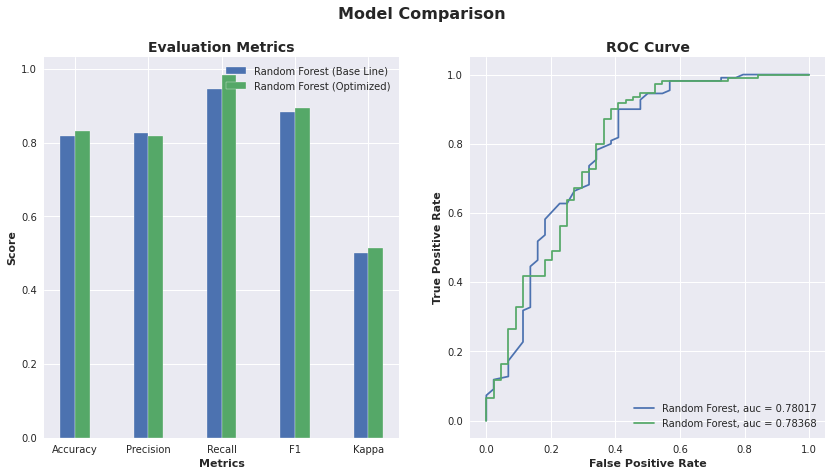

Change of 1.59% on accuracy.
Change of -0.87% on precision.
Change of 3.85% on recall.
Change of 1.27% on F1 score.
Change of 2.67% on Kappa score.
Change of 0.45% on AUC.


In [62]:
# Intitialize figure with two plots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.2
rf_score = [rf_eval['acc'], rf_eval['prec'], rf_eval['rec'], rf_eval['f1'], rf_eval['kappa']]
best_grid_score = [best_grid_eval['acc'], best_grid_eval['prec'], best_grid_eval['rec'], best_grid_eval['f1'], best_grid_eval['kappa']]

## Set position of bar on X axis
r1 = np.arange(len(rf_score))
r2 = [x + barWidth for x in r1]

## Make the plot
ax1.bar(r1, rf_score, width=barWidth, edgecolor='white', label='Random Forest (Base Line)')
ax1.bar(r2, best_grid_score, width=barWidth, edgecolor='white', label='Random Forest (Optimized)')

## Add xticks on the middle of the group bars
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'Kappa']
ax1.set_xticks([r + (barWidth * 0.5) for r in range(len(dtc_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
# ax1.set_ylim(0, 1)

## Create legend & Show graphic
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

# Second plot
## Comparing ROC Curve
ax2.plot(rf_eval['fpr'], rf_eval['tpr'], label='Random Forest, auc = {:0.5f}'.format(rf_eval['auc']))
ax2.plot(best_grid_eval['fpr'], best_grid_eval['tpr'], label='Random Forest, auc = {:0.5f}'.format(best_grid_eval['auc']))

ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')
ax2.legend(loc=4)

plt.show()

print('Change of {:0.2f}% on accuracy.'.format(100 * ((best_grid_eval['acc'] - rf_eval['acc']) / rf_eval['acc'])))
print('Change of {:0.2f}% on precision.'.format(100 * ((best_grid_eval['prec'] - rf_eval['prec']) / rf_eval['prec'])))
print('Change of {:0.2f}% on recall.'.format(100 * ((best_grid_eval['rec'] - rf_eval['rec']) / rf_eval['rec'])))
print('Change of {:0.2f}% on F1 score.'.format(100 * ((best_grid_eval['f1'] - rf_eval['f1']) / rf_eval['f1'])))
print('Change of {:0.2f}% on Kappa score.'.format(100 * ((best_grid_eval['kappa'] - rf_eval['kappa']) / rf_eval['kappa'])))
print('Change of {:0.2f}% on AUC.'.format(100 * ((best_grid_eval['auc'] - rf_eval['auc']) / rf_eval['auc'])))

The result show that our optimised performed little bit better than the original model. The optimised models show an increase in 4 out of the 6 metrics but perform worse in the other metrics.

## Predictions for given test data

In [63]:
from sklearn.metrics import accuracy_score
predictions = best_grid.predict(xte)
Target = pd.DataFrame(predictions,columns=['Loan_Status'])

In [64]:
Loan_ID =pd.DataFrame(test_data1.Loan_ID)

In [65]:
pred=pd.concat([Loan_ID,Target],axis=1)

In [66]:
pred.head()

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1


In [67]:
pred.to_csv('Submission1.csv',index=False)

In [68]:
submission=pd.read_csv("Submission1.csv")

In [69]:
submission.head()

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1


In [70]:
submission["Loan_Status"].value_counts()

1    308
0     59
Name: Loan_Status, dtype: int64

In [71]:
submission = submission.replace({'Loan_Status': {0: 'N', 1 : 'Y'}})

In [72]:
submission

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


In [73]:
submission.to_csv('Submissiongrid.csv',index=False)